In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import pandas as pd
import matplotlib.animation as animation
from matplotlib.colors import Normalize
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [2]:
plt.rcParams['font.family'] ='sans-serif'#使用するフォント
plt.rcParams['xtick.direction'] = 'in'#x軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['ytick.direction'] = 'in'#y軸の目盛線が内向き('in')か外向き('out')か双方向か('inout')
plt.rcParams['xtick.major.width'] = 1.0#x軸主目盛り線の線幅
plt.rcParams['ytick.major.width'] = 1.0#y軸主目盛り線の線幅
plt.rcParams['font.size'] = 14 #フォントの大きさ
plt.rcParams['axes.linewidth'] = 1.0# 軸の線幅edge linewidth。囲みの太さ

### 関数
#### アニメーション

In [17]:
# 3D図
def eta_animation3D(X, Y, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 8), facecolor = "white")
    ax = fig.add_subplot(111, projection='3d')

    surf = ax.plot_surface(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)
    # surf = ax.contourf3D(X, Y, eta_list[0], cmap = plt.cm.RdBu_r)

    def update_surf(num):
        ax.clear()
        surf = ax.plot_surface(X, Y, eta_list[num], cmap = plt.cm.RdBu_r)
        # surf = ax.contourf3D(X, Y, eta_list[num], cmap = plt.cm.RdBu_r)
        ax.set_title("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 24, y=1.04)
        ax.set_xlabel("x [km]", fontname = "serif", fontsize=18)
        ax.set_ylabel("y [km]", fontname = "serif",fontsize=18)
        ax.set_zlabel("z [m]", fontname = "serif",fontsize=18)
        ax.tick_params(labelsize=16)
        # ax.set_xlim(0, np.max(eta_list[num].shape))
        # ax.set_ylim(0, np.max(eta_list[num].shape))
        ax.set_xlim(X.min(), X.max())
        ax.set_ylim(Y.min(), Y.max())
        ax.set_zlim(-2.4, 4.8)
        ax.set_box_aspect((2,1,1))
        plt.tight_layout()
        return surf,

    anim = animation.FuncAnimation(fig, update_surf,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim

In [23]:
# 3D比較
def eta_animation3D_sub(X, Y, z, z_list, nt, frame_interval, filename):
    fig = plt.figure(figsize = (20, 15), facecolor = "white")
    fig.add_subplot(221, projection='3d')
    fig.add_subplot(222, projection='3d')
    fig.add_subplot(223, projection='3d')
    fig.add_subplot(224, projection='3d')

    axes = plt.gcf().get_axes()
    text = fig.suptitle("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
            0), fontname = "serif", fontsize = 28)
    
    for i, ax in enumerate(axes):
        surf = ax.plot_surface(np.array(X[i]), np.array(Y[i]), np.array(z[i][0]), cmap = plt.cm.RdBu_r)
    plt.tight_layout()

    def update_surf(num):
        text.set_text("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
            num*frame_interval/3600))
        for i, ax in enumerate(axes):
            ax.clear()
            x = np.array(X[i])
            y = np.array(Y[i])
            surf = ax.plot_surface(x, y, np.array(z[i][num]), cmap = plt.cm.RdBu_r)
            ax.set_title("nx={}".format(2**(z_list[i]+1)), fontname = "serif", fontsize = 24, y=1.04)
            ax.set_xlabel("x [km]", fontname = "serif", fontsize=18)
            ax.set_ylabel("y [km]", fontname = "serif",fontsize=18)
            ax.set_zlabel("z [m]", fontname = "serif",fontsize=18)
            ax.tick_params(labelsize=16)
            # ax.set_xlim(0, np.max(eta_list[num].shape))
            # ax.set_ylim(0, np.max(eta_list[num].shape))
            ax.set_xlim(x.min(), x.max())
            ax.set_ylim(y.min(), y.max())
            ax.set_zlim(-2.4, 4.8)
            ax.set_box_aspect((2,1,1))
        # plt.tight_layout()
        return surf,

    anim = animation.FuncAnimation(fig, update_surf,
        frames = nt, interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim

In [24]:
# 2Dヒートマップ
def animation2D(X, Y, eta_list, frame_interval, filename):
    fig = plt.figure(figsize = (10, 5), facecolor = "white")
    spec = GridSpec(ncols=2, nrows=1,width_ratios=[50, 1])
    # ax1 = fig.add_subplot(111)
    ax1 = fig.add_subplot(spec[0])
    ax2 = fig.add_subplot(spec[1])

    vmin = -0.3
    vmax = 0.5
    
    surf = ax1.contourf(X, Y, eta_list[0], vmin=vmin, vmax=vmax, cmap = plt.cm.coolwarm)
    
    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
    cbar = mpl.colorbar.ColorbarBase(
        ax=ax2,
        cmap=plt.cm.coolwarm,
        norm=norm,
        orientation="vertical",
        label="z[m]",
    )
    

    def update(num):
        ax1.clear()
        surf = ax1.contourf(X, Y, eta_list[num], vmin=vmin , vmax=vmax, cmap = plt.cm.coolwarm)
        ax1.set_title("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 20, y=1.04)
        ax1.set_xlabel("x [km]", fontname = "serif",fontsize=20)
        ax1.set_ylabel("y [km]", fontname = "serif",fontsize=20)
        ax1.tick_params(labelsize=18)
        
        ax1.set_xlim(X.min(), X.max())
        ax1.set_ylim(Y.min(), Y.max())
        ax2.tick_params(labelsize=18)
        plt.tight_layout()
        return surf,


    anim = animation.FuncAnimation(fig, update,
        frames = len(eta_list), interval = 10, blit = False)
    mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
        codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
    anim.save("{}.mp4".format(filename), writer = mpeg_writer)
    return anim

In [33]:
# y=1500kmでの伝播
def animationY0(x,y,z0,imax,nt,frame_interval,filename):
  fig = plt.figure(figsize = (10, 5), facecolor = "white")
  ax1 = fig.add_subplot(111)
  
  for i in range(imax):
    ax1.plot(x[i], z0[i][0][-1])
  text = ax1.set_title("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
            0), fontname = "serif", fontsize = 20, y=1.04)
  ax1.set_xlabel("x [km]", fontname = "serif", fontsize = 20)
  ax1.set_ylabel("z [m]", fontname = "serif", fontsize = 20)
  ax1.set_ylim(-1,2.5)
  ax1.legend(["nx=4","nx=8","nx=16","nx=32","nx=64","nx=128","nx=256","nx=512"],loc='center left', bbox_to_anchor=(1., .5), fontsize=20)
  ax1.tick_params(labelsize=16)
  
  waves = ax1.get_lines()

  def update(num):
    text.set_text("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
							num*frame_interval/3600))
    for i, wave in enumerate(waves):
      wave.set_data(x[i], z0[i][num][-1])
    plt.tight_layout()


  anim = animation.FuncAnimation(fig, update,
			frames = nt, interval = 10, blit = False)
  mpeg_writer = animation.FFMpegWriter(fps = 6, bitrate = 10000,
			codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
  anim.save("{}.mp4".format(filename), writer = mpeg_writer)

In [34]:
# y=1500kmのマルチグリッドと各層の比較
def animationY0_compare(x,y,z0,orig_z0,imax,nt,frame_interval,filename):
  cmap = plt.get_cmap("tab10")
  fig = plt.figure(figsize = (10, 10), facecolor = "white")
  gs_master = GridSpec(nrows=2, ncols=2, width_ratios=[6,1],hspace=0.8)
  gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
  gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
  ax1 = fig.add_subplot(gs_1[0,:])
  ax2 = fig.add_subplot(gs_1[1,:])
  ax3 = fig.add_subplot(gs_2[:,:])
  gridlist = ["nx=4","nx=8","nx=16","nx=32","nx=64","nx=128","nx=256","nx=512"]
  
  text = fig.suptitle("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
            0), fontname = "serif", fontsize = 24)
  
  for i in range(imax):
    ax1.plot(x[i], z0[i][0][-1],color=cmap(i))
    if(imax-i<5):
      ax2.plot(x[i],orig_z0[i-4][0][-1],color=cmap(i))
    ax3.plot([], [], marker="s", color=cmap(i), label=gridlist[i], linestyle="-") 
  ax1.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax2.set_xlabel("x [km]", fontname = "serif", fontsize = 20)
  ax2.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax1.set_ylim(-1,2.5)
  ax2.set_ylim(-1,2.5)
  ax3.legend(loc='upper center',bbox_to_anchor=(0,0,1,1),fontsize=20)
  ax3.set_axis_off()
  ax3.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
  ax1.tick_params(labelsize=16)
  ax2.tick_params(labelsize=16)
  ax1.set_title("(a)Multigrid",fontsize=20)
  ax2.set_title("(b)No-Multigrid",fontsize=20)
  # ax1.set_title("(a)Multigrid",y=-0.18,fontsize=20)
  # ax2.set_title("(b)No-Multigrid",y=-0.3,fontsize=20)
  
  wave1 = ax1.get_lines()
  wave2 = ax2.get_lines()

  def update(num):
    text.set_text("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
							num*frame_interval/3600))
    for i, wave in enumerate(wave1):
      wave.set_data(x[i], z0[i][num][-1])
    for i, wave in enumerate(wave2):
      wave.set_data(x[i+4], orig_z0[i][num][-1])


  # anim = animation.FuncAnimation(fig, update,
	# 		frames = len(z0[0][:][0][0]), interval = 10, blit = False)
  anim = animation.FuncAnimation(fig, update,
			frames = nt, interval = 10, blit = False)
  mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
			codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
  anim.save("{}.mp4".format(filename), writer = mpeg_writer)

In [35]:
# y=1500kmの時間刻みが違う時の比較
def animationY0_comp_time(x,y,z0,z1,imax,nt,frame_interval,filename):
  cmap = plt.get_cmap("tab10")
  fig = plt.figure(figsize = (10, 10), facecolor = "white")
  gs_master = GridSpec(nrows=2, ncols=2, width_ratios=[6,1],hspace=0.8)
  gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
  gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
  ax1 = fig.add_subplot(gs_1[0,:])
  ax2 = fig.add_subplot(gs_1[1,:])
  ax3 = fig.add_subplot(gs_2[:,:])
  gridlist = ["nx=4","nx=8","nx=16","nx=32","nx=64","nx=128","nx=256","nx=512"]
  

  text = fig.suptitle("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
            0), fontname = "serif", fontsize = 24)
  for i in range(imax):
    ax1.plot(x[i], z0[i][0][-1],color=cmap(i))
    ax2.plot(x[i], z1[i][0][-1],color=cmap(i))
    legend = ax3.plot([], [], marker="s", color=cmap(i), label=gridlist[i], linestyle="-") 
  ax1.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax2.set_xlabel("x [km]", fontname = "serif", fontsize = 20)
  ax2.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax1.set_ylim(-1,2.5)
  ax2.set_ylim(-1,2.5)
  ax3.legend(loc='upper center',bbox_to_anchor=(0,0,1,1), fontsize = 20)
  ax3.set_axis_off()
  ax3.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False) 
  ax1.tick_params(labelsize=16)
  ax2.tick_params(labelsize=16)
  ax1.set_title("(a)dt=60s",fontsize=20)
  ax2.set_title("(b)dt=720s",fontsize=20)
  # plt.tight_layout()
  
  wave1 = ax1.get_lines()
  wave2 = ax2.get_lines()

  def update(num):
    text.set_text("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
							num*frame_interval/3600))
    for i, wave in enumerate(wave1):
      wave.set_data(x[i], z0[i][num][-1])
    for i, wave in enumerate(wave2):
      wave.set_data(x[i], z1[i][int(num/4)][-1])


  anim = animation.FuncAnimation(fig, update, interval=10, frames=nt, repeat=True)
  mpeg_writer = animation.FFMpegWriter(fps = 24, bitrate = 10000,
			codec = "libx264", extra_args = ["-pix_fmt", "yuv420p"])
  anim.save("{}.mp4".format(filename), writer = mpeg_writer)

#### 静止図

In [3]:
# 3D図
def eta_3D(x, y, eta_list, num, frame_interval, filename):
  fig = plt.figure(figsize = (10, 8), facecolor = "white")
  ax = fig.add_subplot(111, projection='3d')
  surf = ax.plot_surface(x, y, eta_list[num], cmap = plt.cm.RdBu_r)
  ax.set_title("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
            num*frame_interval/3600), fontname = "serif", fontsize = 24, y=1.04)
  ax.set_xlabel("x [km]", fontname = "serif", fontsize=16)
  ax.set_ylabel("y [km]", fontname = "serif",fontsize=16)
  ax.set_zlabel("z [m]", fontname = "serif",fontsize=16)
  ax.tick_params(labelsize=14)
  # ax.set_xlim(0, np.max(eta_list[num].shape))
	# ax.set_ylim(0, np.max(eta_list[num].shape))
  ax.set_xlim(x.min(), x.max())
  ax.set_ylim(y.min(), y.max())
  ax.set_zlim(-2.4, 4.8)
  ax.set_box_aspect((2,1,1))
  plt.tight_layout()
  plt.savefig(filename+".png")

In [56]:
# 3D比較
def eta_3D_sub(X, Y, z, z_list, num, frame_interval, filename):
    fig = plt.figure(figsize = (20, 15), facecolor = "white")
    fig.add_subplot(221, projection='3d')
    fig.add_subplot(222, projection='3d')
    fig.add_subplot(223, projection='3d')
    fig.add_subplot(224, projection='3d')

    axes = plt.gcf().get_axes()
    text = fig.suptitle("Surface elevation z(x,y,t) after $t={:.2f}$ hours".format(
        num*frame_interval/3600), fontname = "serif", fontsize = 28)

    for i, ax in enumerate(axes):
        ax.clear()
        x = np.array(X[i])
        y = np.array(Y[i])
        surf = ax.plot_surface(x, y, np.array(z[i][num]), cmap = plt.cm.RdBu_r)
        ax.set_title("nx={}".format(2**(z_list[i]+1)), fontname = "serif", fontsize = 24, y=1.04)
        ax.set_xlabel("x [km]", fontname = "serif", fontsize=18)
        ax.set_ylabel("y [km]", fontname = "serif",fontsize=18)
        ax.set_zlabel("z [m]", fontname = "serif",fontsize=18)
        ax.tick_params(labelsize=16)
        # ax.set_xlim(0, np.max(eta_list[num].shape))
        # ax.set_ylim(0, np.max(eta_list[num].shape))
        ax.set_xlim(x.min(), x.max())
        ax.set_ylim(y.min(), y.max())
        ax.set_zlim(-2.4, 4.8)
        ax.set_box_aspect((2,1,1))
    
    plt.tight_layout()
    plt.savefig(filename+".png")

In [58]:
# y=1500kmのマルチグリッドと各層の比較
def Y0_compare(x,y,z0,orig_z0,imax,num,frame_interval,filename):
  cmap = plt.get_cmap("tab10")
  fig = plt.figure(figsize = (10, 10), facecolor = "white")
  gs_master = GridSpec(nrows=2, ncols=2, width_ratios=[6,1],hspace=0.8)
  gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
  gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
  ax1 = fig.add_subplot(gs_1[0,:])
  ax2 = fig.add_subplot(gs_1[1,:])
  ax3 = fig.add_subplot(gs_2[:,:])
  gridlist = ["nx=4","nx=8","nx=16","nx=32","nx=64","nx=128","nx=256","nx=512"]
  
  text = fig.suptitle("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
							num*frame_interval/3600), fontname = "serif", fontsize = 24)
  
  for i in range(imax):
    ax1.plot(x[i], z0[i][num][-1],color=cmap(i))
    if(imax-i<5):
      ax2.plot(x[i],orig_z0[i-4][num][-1],color=cmap(i))
    ax3.plot([], [], marker="s", color=cmap(i), label=gridlist[i], linestyle="-") 
  ax1.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax2.set_xlabel("x [km]", fontname = "serif", fontsize = 20)
  ax2.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax1.set_ylim(-1,2.5)
  ax2.set_ylim(-1,2.5)
  ax3.legend(loc='upper center',bbox_to_anchor=(0,0,1,1),fontsize=20)
  ax3.set_axis_off()
  ax3.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False)
  ax1.tick_params(labelsize=16)
  ax2.tick_params(labelsize=16)
  ax1.set_title("(a)Multigrid",fontsize=20)
  ax2.set_title("(b)No-Multigrid",fontsize=20)

  plt.savefig(filename+".png")

In [62]:
# y=1500kmの時間刻みが違う時の比較
def Y0_comp_time(x,y,z0,z1,imax,num,frame_interval,filename):
  cmap = plt.get_cmap("tab10")
  fig = plt.figure(figsize = (10, 10), facecolor = "white")
  gs_master = GridSpec(nrows=2, ncols=2, width_ratios=[6,1],hspace=0.8)
  gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 0])
  gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0:2, 1])
  ax1 = fig.add_subplot(gs_1[0,:])
  ax2 = fig.add_subplot(gs_1[1,:])
  ax3 = fig.add_subplot(gs_2[:,:])
  gridlist = ["nx=4","nx=8","nx=16","nx=32","nx=64","nx=128","nx=256","nx=512"]
  

  text = fig.suptitle("Surface elevation z(x,1500,t) after $t={:.2f}$ hours".format(
							num*frame_interval/3600), fontname = "serif", fontsize = 24)
  for i in range(imax):
    ax1.plot(x[i], z0[i][num][-1],color=cmap(i))
    ax2.plot(x[i], z1[i][int(num/4)][-1],color=cmap(i))
    legend = ax3.plot([], [], marker="s", color=cmap(i), label=gridlist[i], linestyle="-") 
  ax1.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax2.set_xlabel("x [km]", fontname = "serif", fontsize = 20)
  ax2.set_ylabel("z[m]", fontname = "serif", fontsize = 20)
  ax1.set_ylim(-1,2.5)
  ax2.set_ylim(-1,2.5)
  ax3.legend(loc='upper center',bbox_to_anchor=(0,0,1,1), fontsize = 20)
  ax3.set_axis_off()
  ax3.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False, bottom=False, left=False, right=False, top=False) 
  ax1.tick_params(labelsize=16)
  ax2.tick_params(labelsize=16)
  ax1.set_title("(a)dt=60s",fontsize=20)
  ax2.set_title("(b)dt=720s",fontsize=20)
  # plt.tight_layout()
  
  plt.savefig(filename+".png")

### 実行系
#### アニメーション

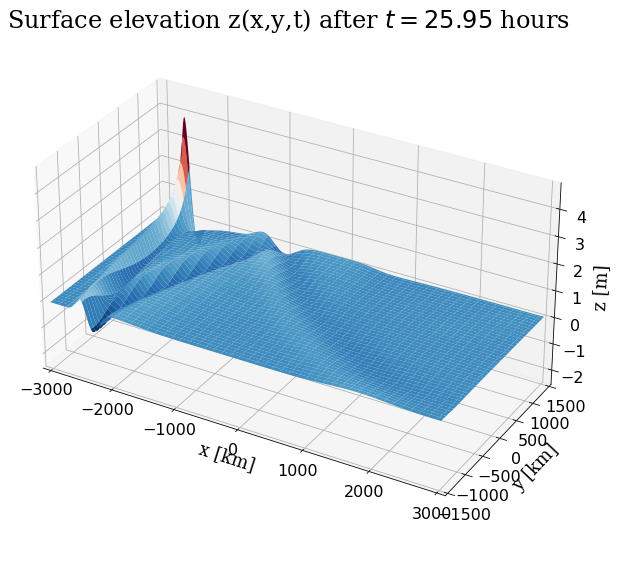

In [21]:
o_filename = "./output/hvary_cont/z8.txt"
f_filename = "./fig/hvary_cont/z_test"

nt = 520
n = 512
ny = 256
z = np.loadtxt(o_filename)
z = z.reshape(nt,ny,n)
x = np.linspace(-3000,3000,n)
y = np.linspace(-1500,1500,ny)
x,y = np.meshgrid(x, y)

# animation2D(x,y,z,720,f_filename)
eta_animation3D(x,y,z,180,f_filename)
# animationX(x,z,720,f_filename)

In [ ]:
o_filename = "./output/z_east_60_512/"
f_filename = "./fig/z_east_60_512/"

nt = 400
for i in range(7):
  k = i+1
  l=8
  n = int(512/(2**(l-k)))
  ny = int(256/(2**(l-k)))
  z = np.loadtxt(o_filename + "z{}.txt".format(k))
  z = z.reshape(nt,ny,n)

  x = np.linspace(-3000,3000,n)
  y = np.linspace(-1500,1500,ny)
  x,y = np.meshgrid(x, y)
  
  eta_animation3D(x,y,z,180,f_filename + "anim_z{}".format(k))

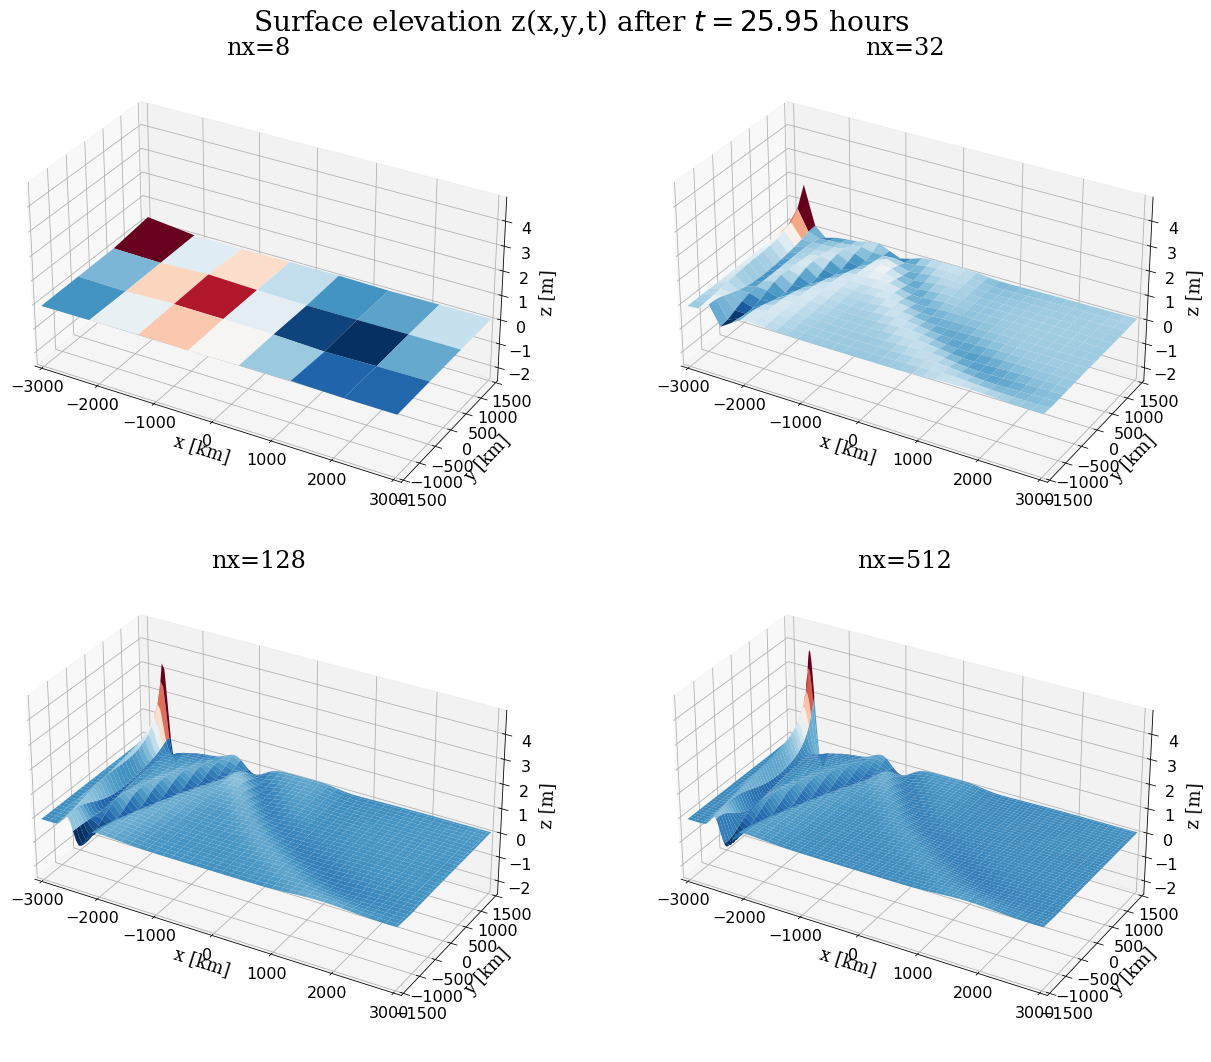

In [29]:
o_filename = "./output/hvary_cont/"
f_filename = "./fig/hvary_cont/z_comp"
ilist = [2,4,6,8]
nt = 520
frame_interval = 180
l=8
imax = 8
nmax = 512
nymax = 256

X = []
Y = []
z0 = []
for k in ilist:
  # k = i+1
  # k = i+4
  n = int(nmax/(2**(l-k)))
  ny = int(nymax/(2**(l-k)))
  z = np.loadtxt(o_filename + "z{}.txt".format(k))
  z = z.reshape(nt,ny,n)
  z0.append(z.tolist())
  x = np.linspace(-3000,3000,n)
  y = np.linspace(-1500,1500,ny)
  x,y = np.meshgrid(x, y)
  X.append(x)
  Y.append(y)
  
eta_animation3D_sub(X, Y, z0, ilist, nt, frame_interval, f_filename)

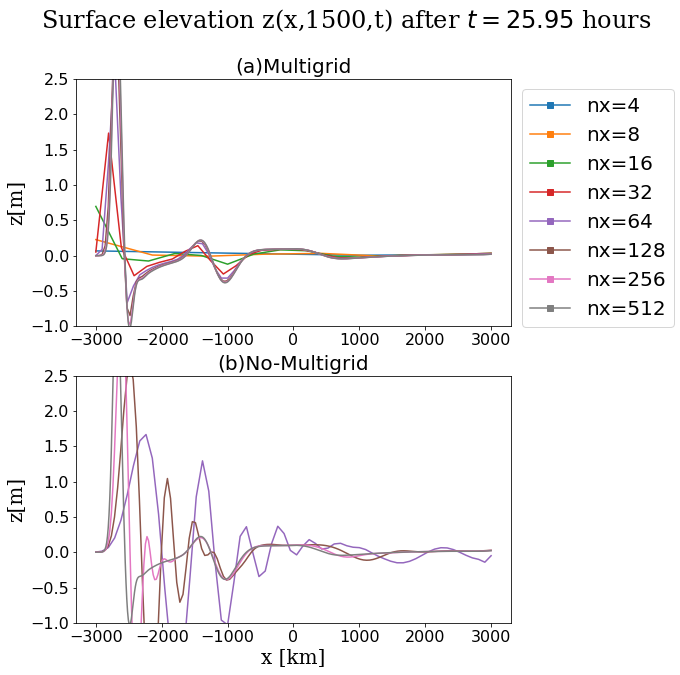

In [36]:
o_filename = "./output/hvary_cont/"
f_filename = "./fig/hvary_cont/animY0"
nt = 520
frame_interval = 180
l=8
imax = 8
nmax = 512
nymax = 256

x = []
z0 = []
orig_z0 = []
for i in range(imax):
  k = i+1
  # k = i+4
  n = int(nmax/(2**(l-k)))
  ny = int(nymax/(2**(l-k)))
  z = np.loadtxt(o_filename + "z{}.txt".format(k))
  z = z.reshape(nt,ny,n)
  z0.append(z.tolist())
  if(l-k<4 and k<l):
    orig_z = np.loadtxt(o_filename + "orig_z{}.txt".format(k))
    orig_z = orig_z.reshape(nt,ny,n)
    orig_z0.append(orig_z.tolist())
  elif(k==l):
    orig_z0.append(z.tolist())
  x.append(list(np.linspace(-3000,3000,n)))
  y = np.linspace(-1500,1500,ny)
  
# animationY0(x,y,z0,imax,nt,frame_interval,f_filename)
animationY0_compare(x,y,z0,orig_z0,imax,nt,frame_interval,f_filename)

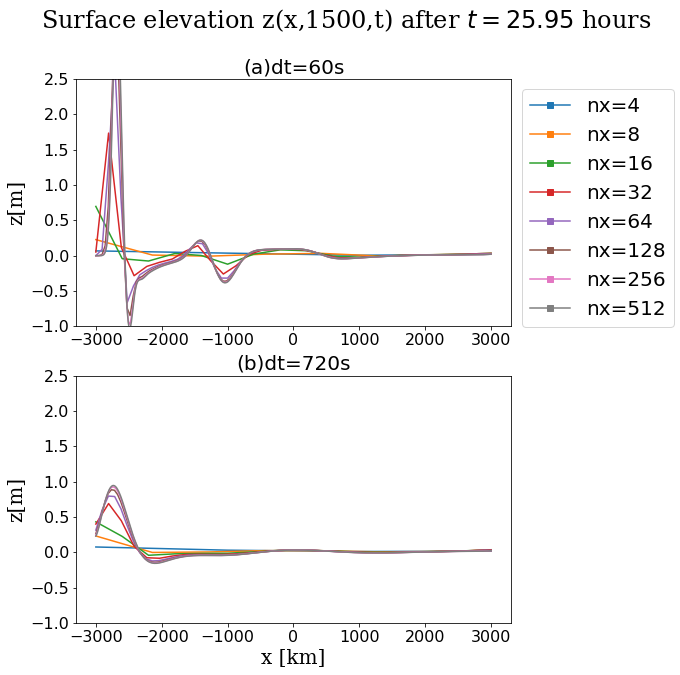

In [40]:
o_filename_60 = "./output/hvary_cont/"
o_filename_720 = "./output/hvary_cont720/"
f_filename = "./fig/animY0_time"
nt60 = 520
nt720= 130
frame_interval = 180
l=8
imax = 8
nmax = 512
nymax = 256

x = []
z0 = []
z1 = []
for i in range(imax):
  k = i+1
  # k = i+4
  n = int(nmax/(2**(l-k)))
  ny = int(nymax/(2**(l-k)))
  z60 = np.loadtxt(o_filename_60 + "z{}.txt".format(k))
  z60 = z60.reshape(nt60,ny,n)
  z0.append(z60.tolist())
  z720 = np.loadtxt(o_filename_720 + "z{}.txt".format(k))
  z720 = z720.reshape(nt720,ny,n)
  z1.append(z720.tolist())
  x.append(list(np.linspace(-3000,3000,n)))
  y = np.linspace(-1500,1500,ny)
  
animationY0_comp_time(x,y,z0,z1,imax,nt60,frame_interval,f_filename)

### 静止画

In [ ]:
o_filename = "./output/z_east_60_512/z8.txt"
f_filename = "./fig/z_east_60_512/first"

# nt = 400
# n = 512
# ny = 256
# z = np.loadtxt(o_filename)
# z = z.reshape(nt,ny,n)
# x = np.linspace(-3000,3000,n)
# y = np.linspace(-1500,1500,ny)
# x,y = np.meshgrid(x, y)

fig = plt.figure(figsize = (10, 8), facecolor = "white")
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z[0], cmap = plt.cm.RdBu_r)
ax.set_title("First elevation", fontname = "serif", fontsize = 24, y=1.04)
ax.set_xlabel("x [km]", fontname = "serif", fontsize=16)
ax.set_ylabel("y [km]", fontname = "serif",fontsize=16)
ax.set_zlabel("z [m]", fontname = "serif",fontsize=16)
ax.tick_params(labelsize=14)
# ax.set_xlim(0, np.max(eta_list[num].shape))
# ax.set_ylim(0, np.max(eta_list[num].shape))
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.set_zlim(-2.4, 4.8)
ax.set_box_aspect((2,1,1))
plt.tight_layout()
plt.savefig(f_filename+".png")

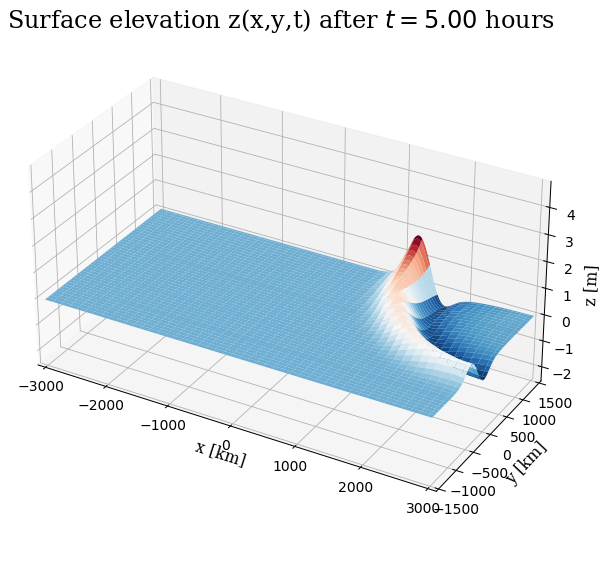

In [56]:
o_filename = "./output/z_east_60_512/z8.txt"
f_filename = "./fig/z_east_60_512/time_100"

num = 100
frame_interval = 180
nt = 400
n = 512
ny = 256
z = np.loadtxt(o_filename)
z = z.reshape(nt,ny,n)
x = np.linspace(-3000,3000,n)
y = np.linspace(-1500,1500,ny)
x,y = np.meshgrid(x, y)

eta_3D(x, y, z, num, frame_interval, f_filename)

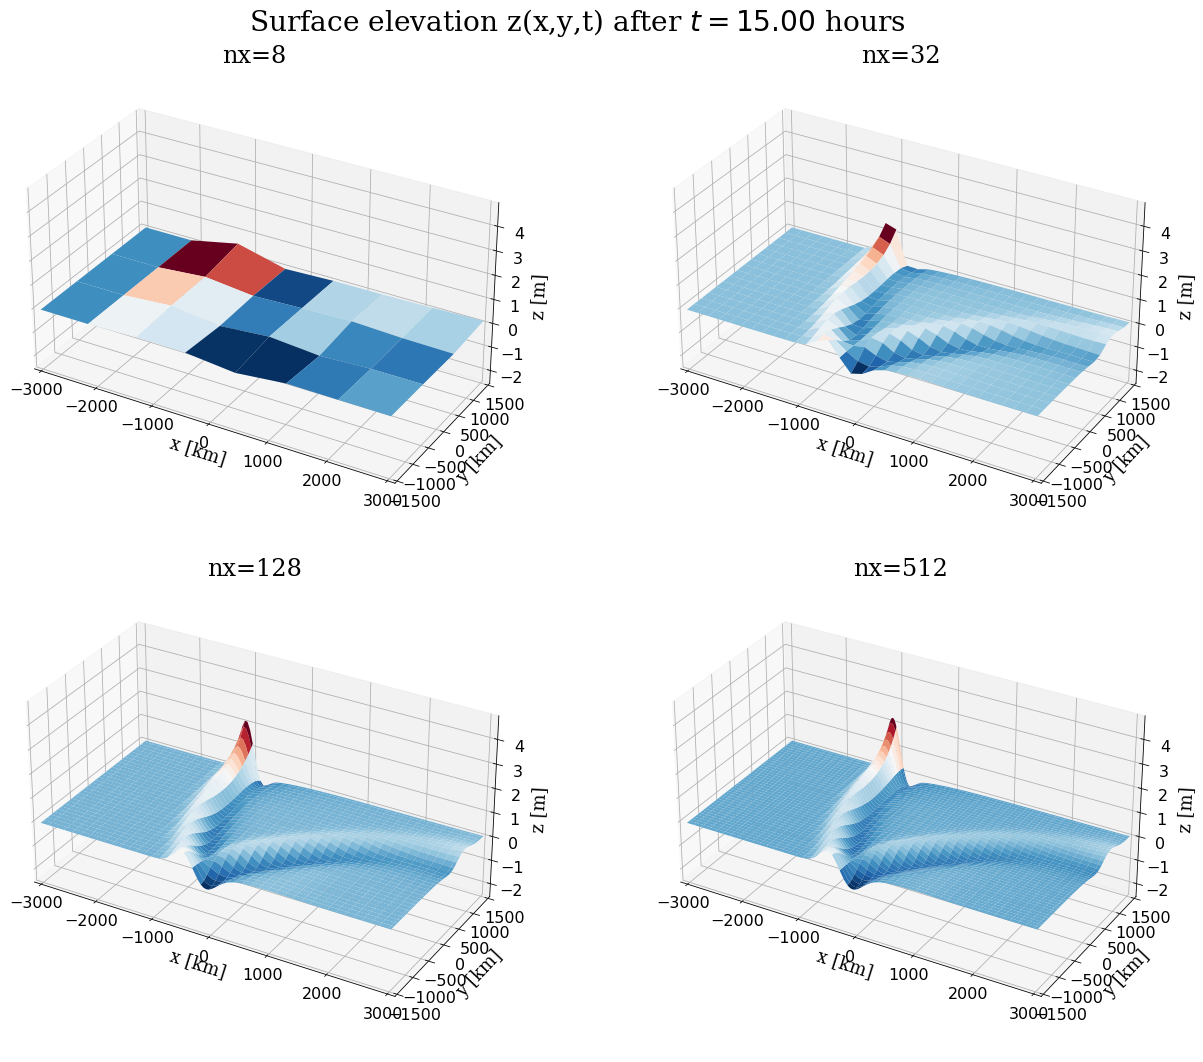

In [57]:
# o_filename = "./output/hvary_cont/"
f_filename = "./fig/hvary_cont/z_comp300"
# ilist = [2,4,6,8]
# nt = 520
# frame_interval = 180
# l=8
# imax = 8
# nmax = 512
# nymax = 256
# num = 300

# X = []
# Y = []
# z0 = []
# for k in ilist:
#   # k = i+1
#   # k = i+4
#   n = int(nmax/(2**(l-k)))
#   ny = int(nymax/(2**(l-k)))
#   z = np.loadtxt(o_filename + "z{}.txt".format(k))
#   z = z.reshape(nt,ny,n)
#   z0.append(z.tolist())
#   x = np.linspace(-3000,3000,n)
#   y = np.linspace(-1500,1500,ny)
#   x,y = np.meshgrid(x, y)
#   X.append(x)
#   Y.append(y)
eta_3D_sub(X, Y, z0, ilist, num, frame_interval, f_filename)

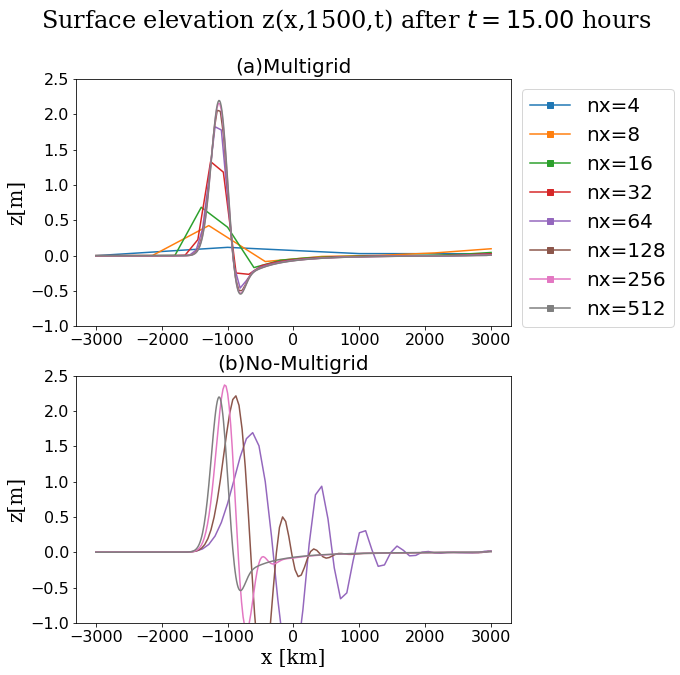

In [59]:
o_filename = "./output/hvary_cont/"
f_filename = "./fig/hvary_cont/animY0_300"
nt = 520
frame_interval = 180
l=8
imax = 8
nmax = 512
nymax = 256
num = 300

x = []
z0 = []
orig_z0 = []
for i in range(imax):
  k = i+1
  # k = i+4
  n = int(nmax/(2**(l-k)))
  ny = int(nymax/(2**(l-k)))
  z = np.loadtxt(o_filename + "z{}.txt".format(k))
  z = z.reshape(nt,ny,n)
  z0.append(z.tolist())
  if(l-k<4 and k<l):
    orig_z = np.loadtxt(o_filename + "orig_z{}.txt".format(k))
    orig_z = orig_z.reshape(nt,ny,n)
    orig_z0.append(orig_z.tolist())
  elif(k==l):
    orig_z0.append(z.tolist())
  x.append(list(np.linspace(-3000,3000,n)))
  y = np.linspace(-1500,1500,ny)
  
Y0_compare(x,y,z0,orig_z0,imax,num,frame_interval,f_filename)

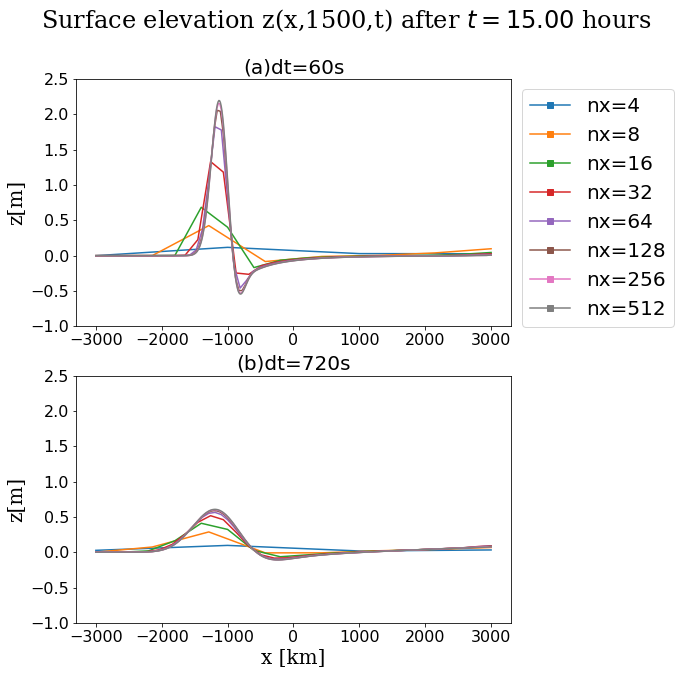

In [63]:
# o_filename_60 = "./output/hvary_cont/"
# o_filename_720 = "./output/hvary_cont720/"
# f_filename = "./fig/animY0_time300"
# nt60 = 520
# nt720= 130
# frame_interval = 180
# l=8
# imax = 8
# nmax = 512
# nymax = 256
# num = 300

# x = []
# z0 = []
# z1 = []
# for i in range(imax):
#   k = i+1
#   # k = i+4
#   n = int(nmax/(2**(l-k)))
#   ny = int(nymax/(2**(l-k)))
#   z60 = np.loadtxt(o_filename_60 + "z{}.txt".format(k))
#   z60 = z60.reshape(nt60,ny,n)
#   z0.append(z60.tolist())
#   z720 = np.loadtxt(o_filename_720 + "z{}.txt".format(k))
#   z720 = z720.reshape(nt720,ny,n)
#   z1.append(z720.tolist())
#   x.append(list(np.linspace(-3000,3000,n)))
#   y = np.linspace(-1500,1500,ny)
  
Y0_comp_time(x,y,z0,z1,imax,num,frame_interval,f_filename)

### 残差減少

In [ ]:
cmap = plt.get_cmap("tab10")
fig = plt.figure(figsize=(15,5))
gs_master = GridSpec(nrows=1, ncols=2, width_ratios=[1,1])
gs_1 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0, 0])
gs_2 = GridSpecFromSubplotSpec(nrows=2, ncols=1, subplot_spec=gs_master[0, 1])
ax1 = fig.add_subplot(gs_1[:,:])
ax2 = fig.add_subplot(gs_2[:,:])

for i in range(5):
  k = i + 1
  res60 = np.loadtxt("./output/res60/res{}.txt".format(k))
  res720= np.loadtxt("./output/res720/res{}.txt".format(k))
  ax1.plot(res60,'o-',label="ngrid={}".format(k),color=cmap(i))
  ax2.plot(res720,'o-',label="ngrid={}".format(k),color=cmap(i))

ax1.set_title("dt = 60s")
ax2.set_title("dt = 720s")
ax1.set_yscale('log')
ax2.set_yscale('log')
ax2.legend(loc='center left', bbox_to_anchor=(1., .5))
ax1.set_xlabel("Iterations")
ax2.set_xlabel("Iterations")
ax1.set_ylabel("Residuals")
ax1.set_xlim(0,20)
ax2.set_xlim(0,50)
plt.tight_layout()
plt.savefig("./fig/residuals.png")

In [9]:
np.sqrt(9.8*1e3)

98.99494936611666

In [16]:
60*144

8640